# Complex Contours

Examples of the contour algorithms with images.

In [ ]:
using Images
using Plots
using Revise

In [ ]:
Revise.includet("../Contours/src/Contours.jl");
using .Contours
Revise.track(Contours, "../Contours/src/draw.jl")

# Simple images

In [ ]:
function fill_circle!(image, radius, color)
    # backward algorithm
    height, width = size(image)
    centre = (width/2, height/2)
    for x in 1:height
        for y in 1: width
            z = radius^2 - (x - centre[1])^2 - (y - centre[2])^2
            if z > 0
                img_circle[CartesianIndex(y, x)] = color
            end
        end
    end
end

fill_circle! (generic function with 1 method)

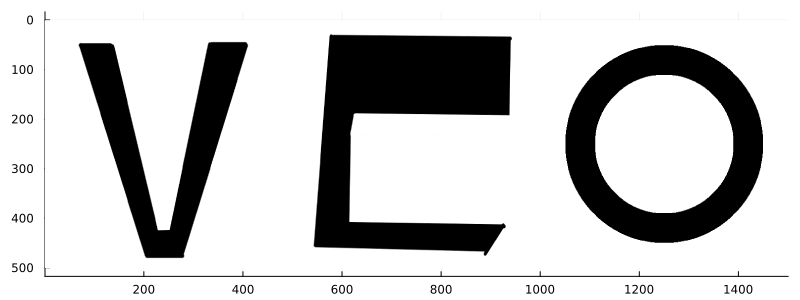

In [ ]:
imsize= 500
radius = 200
img_circle = Gray.(ones(imsize, imsize))
fill_circle!(img_circle, radius, 0)
fill_circle!(img_circle, 0.7 * radius, 1)

images_dir = "../images/contours"
img_v = load(joinpath(images_dir, "v_shape.png"))
img_e = load(joinpath(images_dir, "e_shape.png"))

test_images = [img_v, img_e, img_circle]
for i in 1:length(test_images)
    image = test_images[i]
    test_images[i] = imresize(image, (imsize, imsize))
end

plot(hcat(test_images...), size=(800, 300))

## Contours and Centroids

Contours

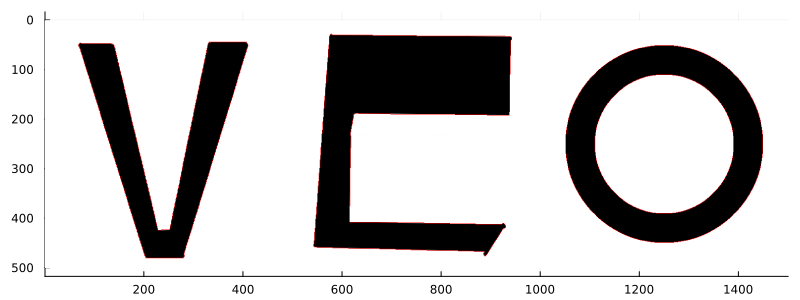

In [ ]:
outputs = []
contours_max = []
for image in test_images
    image_contour = RGB.(image)
    gray = ones(size(image)) - Gray.(image)
    contours = find_contours(gray)
    draw_contours!(image_contour, contours, RGB(1, 0, 0))
    push!(outputs, image_contour)
    
    idx_max = argmax(map(area_contour, contours))
    push!(contours_max, contours[idx_max])
end
frame = plot(hcat(outputs...), size=(800, 300))

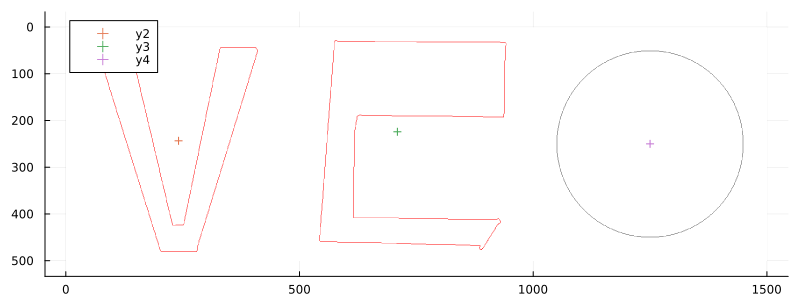

In [ ]:
centroids = []
outputs = []
for contour in contours_max
    centroid = centroid_contour(contour)
    push!(centroids, centroid)
end

for i in 1:length(test_images)
    T = typeof(test_images[i]).parameters[1]
    image_out = ones(T, size(test_images[i]))
    draw_contour!(image_out, contours_max[i], RGB(1, 0, 0))
    push!(outputs, image_out)
end


x0 = 0
frame = plot(hcat(outputs...), size=(800, 300))
for i in 1:length(test_images)
    scatter!(frame, [x0 + centroids[i][1]], [centroids[i][2]], markershape=:cross)
    height, width = size(test_images[i])
    x0 += width
end
frame

  0.560142 seconds (1.62 M allocations: 78.981 MiB, 5.28% gc time, 95.66% compilation time)
  0.020767 seconds (189.25 k allocations: 9.538 MiB)
  0.131276 seconds (194.53 k allocations: 9.803 MiB, 91.37% compilation time)


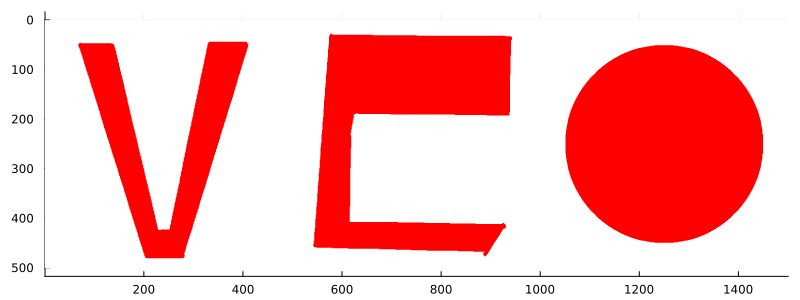

In [ ]:
masked_images = []
for i in 1:length(test_images)
    masked = RGB.(test_images[i])
    @time fill_contour!(masked, contours_max[i], RGB(1, 0, 0))
    push!(masked_images, masked)
end
frame = plot(hcat(masked_images...), size=(800, 300))

## Complex Images

In [ ]:
using ImageBinarization

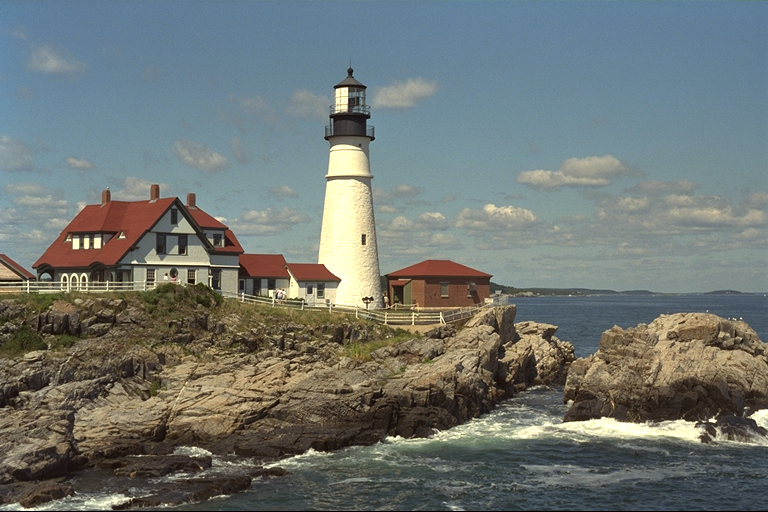

In [ ]:
image_path = "../images/contours/lighthouse.png"
image = load(image_path)

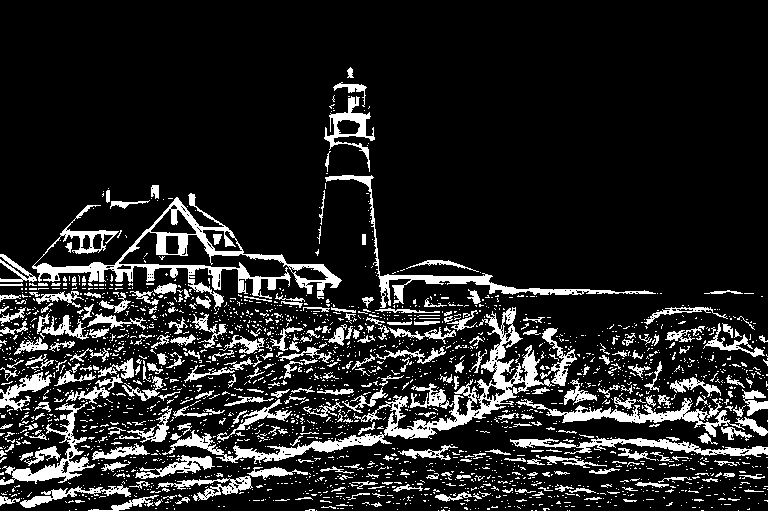

In [ ]:
gray = Gray.(image)
binaryalg = AdaptiveThreshold(window_size=21, percentage=20)
blackwhite = ones(size(gray)) - binarize(gray, binaryalg) 

In [ ]:
contours = find_contours(blackwhite, external_only=false);
length(contours)

2972

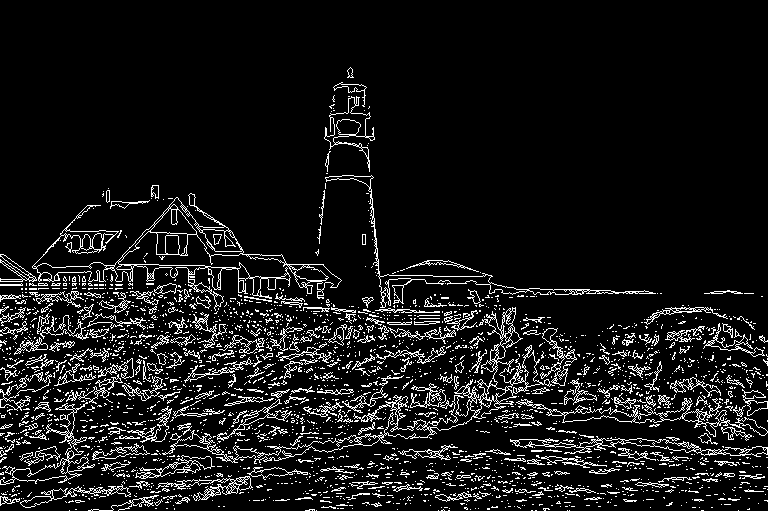

In [ ]:
T = typeof(image).parameters[1]
img_contours = zeros(T, size(image)...) 
draw_contours!(img_contours, contours, RGB(1, 1, 1))
img_contours

  1.095142 seconds (8.92 M allocations: 500.527 MiB, 11.23% gc time, 11.91% compilation time)


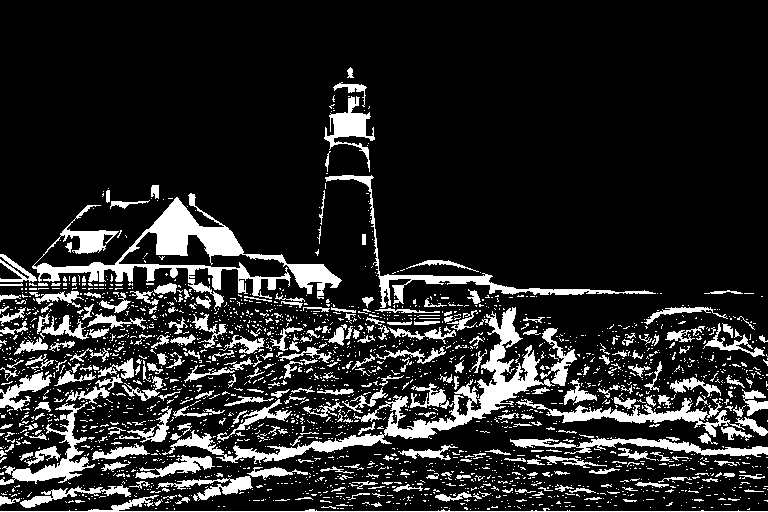

In [ ]:
img_contours = zeros(RGB, size(image)...) 
@time fill_contours!(img_contours, contours, RGB(1, 1, 1), ScanFill())
img_contours

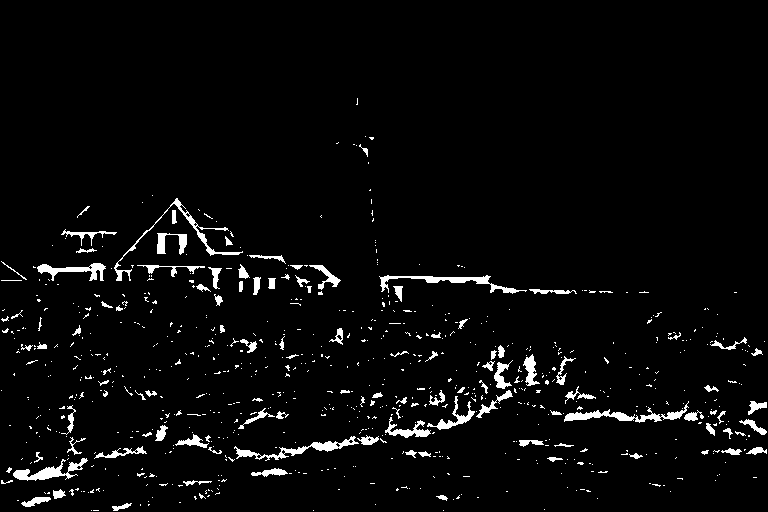

In [ ]:
img1 = zeros(Int, size(image)...) 
fill_contours!(img1, contours, 1, ScanFill())
img2 = zeros(Int, size(image)...) 
fill_contours!(img2, contours, 1, Boundary4Fill())
Gray.(img1 - img2)